In [1]:
## pip install --user itkwidgets
## pip install --uesr tensorboard-plugin-3d
import os
import glob
import shutil
import numpy as np
import torch
from torch.utils.tensorboard import SummaryWriter
from monai.utils import first, set_determinism
from monai.data import DataLoader, Dataset
from monai.visualize import blend_images, matshow3d, plot_2d_or_3d_image

from itkwidgets import view
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from monai.transforms import (
    Compose,
    EnsureChannelFirstd,
    LoadImage,
    LoadImaged,
    Orientationd,
    CropForegroundd,
    ScaleIntensityRanged,
    Spacingd,
)
from monai.config import print_config

In [3]:
print_config()

MONAI version: 1.2.dev2302
Numpy version: 1.19.2
Pytorch version: 1.13.1+cu116
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 708e1a1cf4a1d5516eaf65b8a0bee8887cdee494
MONAI __file__: c:\users\user\appdata\local\programs\python\python38\lib\site-packages\monai\__init__.py

Optional dependencies:
Pytorch Ignite version: 0.4.10
Nibabel version: 4.0.1
scikit-image version: 0.19.3
Pillow version: 9.1.1
Tensorboard version: 2.11.2
gdown version: 4.6.0
TorchVision version: 0.14.1+cu116
tqdm version: 4.64.0
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 5.9.1
pandas version: 1.4.2
einops version: NOT INSTALLED or UNKNOWN VERSION.
transformers version: NOT INSTALLED or UNKNOWN VERSION.
mlflow version: NOT INSTALLED or UNKNOWN VERSION.
pynrrd version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-recommended-depe

In [4]:
os.listdir("data/")

['images', 'manual_spleen_segmentations']

In [5]:
train_images= sorted(glob.glob("data/images/*.nii"))
train_labels= sorted(glob.glob("data/manual_spleen_segmentations/*.nii"))

In [6]:
data_dicts= [{"image": image_name, "label": label_name}
            for image_name, label_name in zip(train_images, train_labels)]

In [7]:
data_dicts[0]

{'image': 'data/images\\00001---002.nii',
 'label': 'data/manual_spleen_segmentations\\00001---002.nii'}

In [10]:
set_determinism(seed= 777)

In [8]:
both_keys= ["image", "label"]
pixdim= (1.5, 1.5, 2.0)

"""
level: 80
width= 120,150, 100
====================
level: 90
width= 80, 90, 100, 110, 120
"""
level= 90
width= 90
a_min= level - (width//2)
a_max= level + (width//2)

print(f" a_min: {a_min}, a_max:{a_max}")

 a_min: 45, a_max:135


______

In [9]:
transform= Compose([
    LoadImaged(both_keys),
    EnsureChannelFirstd(keys=both_keys),
    Orientationd(keys=both_keys, axcodes="PLS"),
    Spacingd(keys=both_keys, pixdim= pixdim, mode= ("bilinear", "nearest")),
    ScaleIntensityRanged(keys=['image'], a_min=a_min, a_max=a_max, b_min= 0.0, b_max= 1.0, clip= True),
    CropForegroundd(keys= both_keys, source_key= "image"),
])

In [13]:
check_ds= Dataset(data= data_dicts, transform= transform)
check_loader= DataLoader(check_ds, batch_size= 1)
# data= first(check_loader)
# print(f"image shape: {data['image'].shape} \nmask shape: {data['label'].shape}")

In [34]:
for idx, item in enumerate(check_loader):
    print(f"{idx} image shape: {item['image'].shape}, ===> mask shape: {item['label'].shape}, {np.min(item['image']), np.max(item['image'])}")

0 image shape: torch.Size([1, 1, 167, 219, 231]), ===> mask shape: torch.Size([1, 1, 167, 219, 231]), (0.0, 1.0)
1 image shape: torch.Size([1, 1, 166, 205, 211]), ===> mask shape: torch.Size([1, 1, 166, 205, 211]), (0.0, 1.0)
2 image shape: torch.Size([1, 1, 173, 208, 196]), ===> mask shape: torch.Size([1, 1, 173, 208, 196]), (0.0, 1.0)
3 image shape: torch.Size([1, 1, 324, 323, 226]), ===> mask shape: torch.Size([1, 1, 324, 323, 226]), (0.0, 1.0)
4 image shape: torch.Size([1, 1, 235, 299, 250]), ===> mask shape: torch.Size([1, 1, 235, 299, 250]), (0.0, 1.0)
5 image shape: torch.Size([1, 1, 239, 266, 260]), ===> mask shape: torch.Size([1, 1, 239, 266, 260]), (0.0, 1.0)
6 image shape: torch.Size([1, 1, 185, 211, 220]), ===> mask shape: torch.Size([1, 1, 185, 211, 220]), (0.0, 1.0)
7 image shape: torch.Size([1, 1, 245, 272, 230]), ===> mask shape: torch.Size([1, 1, 245, 272, 230]), (0.0, 1.0)
8 image shape: torch.Size([1, 1, 206, 224, 125]), ===> mask shape: torch.Size([1, 1, 206, 224, 1

72 image shape: torch.Size([1, 1, 209, 220, 231]), ===> mask shape: torch.Size([1, 1, 209, 220, 231]), (0.0, 1.0)
73 image shape: torch.Size([1, 1, 232, 260, 227]), ===> mask shape: torch.Size([1, 1, 232, 260, 227]), (0.0, 1.0)
74 image shape: torch.Size([1, 1, 243, 274, 231]), ===> mask shape: torch.Size([1, 1, 243, 274, 231]), (0.0, 1.0)
75 image shape: torch.Size([1, 1, 224, 263, 220]), ===> mask shape: torch.Size([1, 1, 224, 263, 220]), (0.0, 1.0)
76 image shape: torch.Size([1, 1, 189, 252, 261]), ===> mask shape: torch.Size([1, 1, 189, 252, 261]), (0.0, 1.0)
77 image shape: torch.Size([1, 1, 168, 219, 228]), ===> mask shape: torch.Size([1, 1, 168, 219, 228]), (0.0, 1.0)
78 image shape: torch.Size([1, 1, 197, 265, 217]), ===> mask shape: torch.Size([1, 1, 197, 265, 217]), (0.0, 1.0)
79 image shape: torch.Size([1, 1, 240, 238, 217]), ===> mask shape: torch.Size([1, 1, 240, 238, 217]), (0.0, 1.0)
80 image shape: torch.Size([1, 1, 180, 205, 185]), ===> mask shape: torch.Size([1, 1, 18

image shape: torch.Size([1, 1, 167, 219, 231])


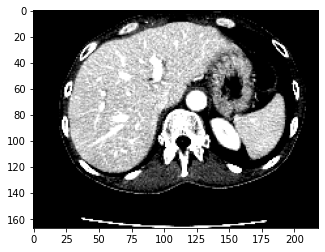

In [23]:
data= first(check_loader)
print(f"image shape: {data['image'].shape}")
plt.imshow(data['image'][0, 0, :, :, 190], cmap= 'gray')

In [28]:
len(check_loader.dataset.data)

95

In [29]:
check_loader.dataset.data

[{'image': 'data/images\\00001---002.nii',
  'label': 'data/manual_spleen_segmentations\\00001---002.nii'},
 {'image': 'data/images\\00002---002.nii',
  'label': 'data/manual_spleen_segmentations\\00002---002.nii'},
 {'image': 'data/images\\00004---003.nii',
  'label': 'data/manual_spleen_segmentations\\00004---003.nii'},
 {'image': 'data/images\\00005---003.nii',
  'label': 'data/manual_spleen_segmentations\\00005---003.nii'},
 {'image': 'data/images\\00006---003.nii',
  'label': 'data/manual_spleen_segmentations\\00006---003.nii'},
 {'image': 'data/images\\00007---302.nii',
  'label': 'data/manual_spleen_segmentations\\00007---302.nii'},
 {'image': 'data/images\\00008---003.nii',
  'label': 'data/manual_spleen_segmentations\\00008---003.nii'},
 {'image': 'data/images\\00009---003.nii',
  'label': 'data/manual_spleen_segmentations\\00009---003.nii'},
 {'image': 'data/images\\00010---003.nii',
  'label': 'data/manual_spleen_segmentations\\00010---003.nii'},
 {'image': 'data/images\\000

In [30]:
data_dicts

[{'image': 'data/images\\00001---002.nii',
  'label': 'data/manual_spleen_segmentations\\00001---002.nii'},
 {'image': 'data/images\\00002---002.nii',
  'label': 'data/manual_spleen_segmentations\\00002---002.nii'},
 {'image': 'data/images\\00004---003.nii',
  'label': 'data/manual_spleen_segmentations\\00004---003.nii'},
 {'image': 'data/images\\00005---003.nii',
  'label': 'data/manual_spleen_segmentations\\00005---003.nii'},
 {'image': 'data/images\\00006---003.nii',
  'label': 'data/manual_spleen_segmentations\\00006---003.nii'},
 {'image': 'data/images\\00007---302.nii',
  'label': 'data/manual_spleen_segmentations\\00007---302.nii'},
 {'image': 'data/images\\00008---003.nii',
  'label': 'data/manual_spleen_segmentations\\00008---003.nii'},
 {'image': 'data/images\\00009---003.nii',
  'label': 'data/manual_spleen_segmentations\\00009---003.nii'},
 {'image': 'data/images\\00010---003.nii',
  'label': 'data/manual_spleen_segmentations\\00010---003.nii'},
 {'image': 'data/images\\000

In [32]:
len(data_dicts)

95